In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
# from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

## Multiple Linear Regression

In [73]:
df = pd.read_excel("hour.xlsx")
df.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,temp_new,atemp,atemp_new,hum,hum_new,windspeed,windspeed_new,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,24.0,0.2879,2879.0,0.81,81.0,0.0000,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,22.0,0.2727,2727.0,0.80,80.0,0.0000,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,22.0,0.2727,2727.0,0.80,80.0,0.0000,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,24.0,0.2879,2879.0,0.75,75.0,0.0000,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,24.0,0.2879,2879.0,0.75,75.0,0.0000,0.0,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,...,24.0,0.2576,2576.0,0.75,75.0,0.0896,896.0,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,...,22.0,0.2727,2727.0,0.80,80.0,0.0000,0.0,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,...,20.0,0.2576,2576.0,0.86,86.0,0.0000,0.0,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,...,24.0,0.2879,2879.0,0.75,75.0,0.0000,0.0,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,...,32.0,0.3485,3485.0,0.76,76.0,0.0000,0.0,8,6,14


In [130]:
y = df['cnt']
x = df.loc[:,['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp_new', 'atemp_new' ,'hum_new', 'windspeed']]

In [131]:
y.head()

0    16
1    40
2    32
3    13
4     1
Name: cnt, dtype: int64

In [132]:
x.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp_new,atemp_new,hum_new,windspeed
0,1,0,1,0,0,6,0,1,24.0,2879.0,81.0,0.0
1,1,0,1,1,0,6,0,1,22.0,2727.0,80.0,0.0
2,1,0,1,2,0,6,0,1,22.0,2727.0,80.0,0.0
3,1,0,1,3,0,6,0,1,24.0,2879.0,75.0,0.0
4,1,0,1,4,0,6,0,1,24.0,2879.0,75.0,0.0


In [133]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [134]:
model = LinearRegression()
model.fit(X_train, y_train)
cnt_pred = model.predict(X_test)

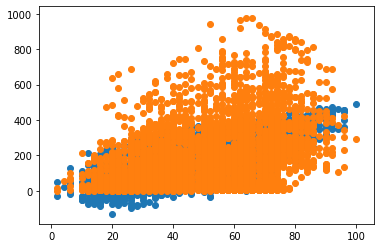

In [138]:
plt.scatter(X_test.iloc[:,8], cnt_pred);
plt.scatter(X_test.iloc[:,8], y_test)

In [139]:
# The coefficients

print('Coefficients: \n', model.coef_)

print('Intercept: \n', model.intercept_)

# The mean squared error

print('Mean squared error: %.2f'
      % mean_squared_error(y_test, cnt_pred))

# The coefficient of determination: 1 is perfect prediction

print('Coefficient of determination: %.2f'
      % r2_score(y_test, cnt_pred))

Coefficients: 
 [ 1.88703810e+01  8.08551971e+01  1.67059872e-01  7.58415633e+00
 -2.13788945e+01  2.32126396e+00  3.91390342e+00 -2.82060756e+00
  4.59500309e-01  2.70719450e-02 -1.99105031e+00  3.88431423e+01]
Intercept: 
 -27.42819679844655
Mean squared error: 19990.53
Coefficient of determination: 0.40
